<a href="https://colab.research.google.com/github/Aldahir-upc/gobierno_datos_207/blob/main/TAREA_ALDAHIR_LLANTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**API TIPO DE CAMBIO**

In [16]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# URL del API
url = "https://api.apis.net.pe/v2/sunat/tipo-cambio"

# Tu token de autorización
token = "apis-token-14124.QRryVT0QcjGYKRFgQP44M5IopmOmfRi6"

# Header de autorización
headers = {
    "Authorization": f"Bearer {token}"
}

# Definir el rango de fechas (un mes de datos históricos)
inicio = datetime(2023, 4, 1)
fin = datetime(2023, 4, 30)

# Lista para almacenar los resultados
registros = []

# Iteramos sobre el rango de fechas
fecha_actual = inicio
while fecha_actual <= fin:
    fecha_str = fecha_actual.strftime("%Y-%m-%d")
    print(f"Consultando tipo de cambio para la fecha: {fecha_str}")

    # Hacemos la solicitud a la API
    response = requests.get(f"{url}?fecha={fecha_str}", headers=headers)

    if response.status_code == 200:
        data = response.json()

        # Imprimir la respuesta completa para verificar su estructura
        print(f"Respuesta de la API para {fecha_str}: {data}")

        # Verificamos si los datos existen y ajustamos las claves a las correctas según la respuesta
        if 'precioCompra' in data and 'precioVenta' in data:
            registros.append({
                "fecha": data["fecha"],  # Usamos la fecha que se devuelve en la respuesta
                "compra": data["precioCompra"],
                "venta": data["precioVenta"],
                "moneda": data["moneda"]
            })
        else:
            print(f"No se encontraron datos de tipo de cambio para la fecha {fecha_str}")
    else:
        print(f"Error en {fecha_str}: {response.status_code}")

    fecha_actual += timedelta(days=1)

# Guardar los datos en un DataFrame de pandas
df = pd.DataFrame(registros)

# Ver los primeros datos para asegurar que se cargaron correctamente
print("\nDatos cargados:")
print(df)

# Calcular indicadores de calidad de los datos
def calcular_indicadores(df):
    indicadores = {}

    # 1. Porcentaje de valores faltantes
    porcentaje_faltantes = df.isnull().mean() * 100
    indicadores["Porcentaje de valores faltantes"] = porcentaje_faltantes

    # 2. Valor promedio de compra y venta
    promedio_compra = df["compra"].mean() if "compra" in df.columns else None
    promedio_venta = df["venta"].mean() if "venta" in df.columns else None
    indicadores["Promedio compra"] = promedio_compra
    indicadores["Promedio venta"] = promedio_venta

    # 3. Desviación estándar de compra y venta (detectar cambios drásticos)
    desviacion_compra = df["compra"].std() if "compra" in df.columns else None
    desviacion_venta = df["venta"].std() if "venta" in df.columns else None
    indicadores["Desviación estándar compra"] = desviacion_compra
    indicadores["Desviación estándar venta"] = desviacion_venta

    # 4. Número de registros
    num_registros = df.shape[0]
    indicadores["Número de registros"] = num_registros

    # 5. Datos duplicados
    duplicados = df.duplicated().sum()
    indicadores["Número de registros duplicados"] = duplicados

    # 6. Detección de valores nulos
    nulos = df.isnull().sum().sum()
    indicadores["Número de valores nulos"] = nulos

    # 7. Rango de los valores de compra y venta (máximos y mínimos)
    max_compra = df["compra"].max() if "compra" in df.columns else None
    min_compra = df["compra"].min() if "compra" in df.columns else None
    max_venta = df["venta"].max() if "venta" in df.columns else None
    min_venta = df["venta"].min() if "venta" in df.columns else None
    indicadores["Máximo compra"] = max_compra
    indicadores["Mínimo compra"] = min_compra
    indicadores["Máximo venta"] = max_venta
    indicadores["Mínimo venta"] = min_venta

    return indicadores

# Calcular los indicadores
indicadores = calcular_indicadores(df)

# Mostrar los indicadores
print("\nIndicadores de calidad de los datos:")
for clave, valor in indicadores.items():
    print(f"{clave}: {valor}")

# Guardar el DataFrame en un archivo CSV
df.to_csv("tipo_cambio_historico_abri_2023.csv", index=False)
# ===============================
# Indicadores de Calidad de los Datos
# ===============================
# Esta función calcula métricas importantes para evaluar la calidad del dataset:

# 1. Porcentaje de valores faltantes:
#    Mide el porcentaje de celdas vacías. Una alta cantidad puede indicar problemas de calidad.

# 2. Promedio compra / venta:
#    Muestra el valor promedio del tipo de cambio en el período. Sirve para análisis generales.

# 3. Desviación estándar compra / venta:
#    Mide la variabilidad de los datos. Valores altos pueden indicar inestabilidad o errores.

# 4. Número de registros:
#    Cantidad total de filas en el dataset. En este caso, debería haber un registro por día.

# 5. Número de registros duplicados:
#    Detecta si hay filas repetidas, lo cual puede distorsionar los análisis.

# 6. Número de valores nulos:
#    Cantidad de celdas sin datos. Similar al porcentaje de valores faltantes, pero en valor absoluto.

# 7. Máximo y mínimo de compra / venta:
#    Ayuda a identificar los valores extremos del tipo de cambio, útiles para detectar outliers o errores.


Consultando tipo de cambio para la fecha: 2023-04-01
Respuesta de la API para 2023-04-01: {'precioCompra': 3.662, 'precioVenta': 3.667, 'moneda': 'USD', 'fecha': '2025-04-04'}
Consultando tipo de cambio para la fecha: 2023-04-02
Respuesta de la API para 2023-04-02: {'precioCompra': 3.662, 'precioVenta': 3.667, 'moneda': 'USD', 'fecha': '2025-04-04'}
Consultando tipo de cambio para la fecha: 2023-04-03
Respuesta de la API para 2023-04-03: {'precioCompra': 3.662, 'precioVenta': 3.667, 'moneda': 'USD', 'fecha': '2025-04-04'}
Consultando tipo de cambio para la fecha: 2023-04-04
Respuesta de la API para 2023-04-04: {'precioCompra': 3.662, 'precioVenta': 3.667, 'moneda': 'USD', 'fecha': '2025-04-04'}
Consultando tipo de cambio para la fecha: 2023-04-05
Respuesta de la API para 2023-04-05: {'precioCompra': 3.662, 'precioVenta': 3.667, 'moneda': 'USD', 'fecha': '2025-04-04'}
Consultando tipo de cambio para la fecha: 2023-04-06
Respuesta de la API para 2023-04-06: {'precioCompra': 3.662, 'preci

**API DE TEMPERATURA**

Número de registros duplicados: 0
Número de valores nulos: 0
Número de horas faltantes: 0
Número de valores atípicos: 0
Número de inconsistencias temporales (horas faltantes o duplicadas): 1


<ipython-input-7-c5e52ef8f69d>:44: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  missing_times = pd.date_range(start=df['time'].min(), end=df['time'].max(), freq='H')


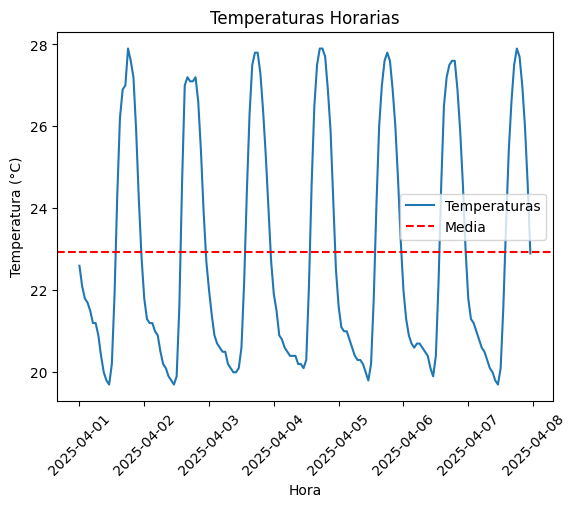

In [ ]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Función para obtener los datos de la API
def obtener_datos_temperatura(latitude, longitude):
    url = f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&hourly=temperature_2m"

    # Realizamos la solicitud GET a la API
    response = requests.get(url)

    # Verificamos si la solicitud fue exitosa
    if response.status_code == 200:
        return response.json()
    else:
        print("Error al obtener los datos.")
        return None

# Función para analizar la calidad de los datos
def analizar_calidad(datos):
    # Extraemos la lista de temperaturas y los tiempos correspondientes
    temperaturas = datos["hourly"]["temperature_2m"]
    tiempos = datos["hourly"]["time"]

    # Creamos un DataFrame para facilitar el análisis
    df = pd.DataFrame({"time": tiempos, "temperature": temperaturas})

    # Asegurarnos de que los tiempos estén en formato datetime
    df['time'] = pd.to_datetime(df['time'])

    # Indicadores de calidad:

    # 1. Duplicados
    duplicados = df[df.duplicated()]
    print(f"Número de registros duplicados: {len(duplicados)}")

    # 2. Nulos o faltantes
    nulos = df.isnull().sum()
    print(f"Número de valores nulos: {nulos['temperature']}")

    # 3. Faltantes de tiempo
    # Verificamos si los datos están completos por hora
    missing_times = pd.date_range(start=df['time'].min(), end=df['time'].max(), freq='H')
    missing_data = missing_times.difference(df['time'])
    print(f"Número de horas faltantes: {len(missing_data)}")

    # 4. Detección de valores atípicos
    media_temperatura = np.mean(df['temperature'])
    desviacion_temperatura = np.std(df['temperature'])
    valores_atipicos = df[abs(df['temperature'] - media_temperatura) > 2 * desviacion_temperatura]
    print(f"Número de valores atípicos: {len(valores_atipicos)}")

    # 5. Consistencia temporal: Si la diferencia entre tiempos no es de exactamente una hora
    diferencias = df['time'].diff().dt.total_seconds() / 3600
    inconsistencias_temporales = diferencias[diferencias != 1]
    print(f"Número de inconsistencias temporales (horas faltantes o duplicadas): {len(inconsistencias_temporales)}")

    # Graficamos las temperaturas para visualizar la distribución
    plt.plot(df['time'], df['temperature'], label="Temperaturas")
    plt.axhline(media_temperatura, color='red', linestyle='--', label="Media")
    plt.xlabel("Hora")
    plt.ylabel("Temperatura (°C)")
    plt.title("Temperaturas Horarias")
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# Coordenadas de ejemplo (puedes cambiar estos valores por las coordenadas del Perú o de cualquier otra ubicación)
latitude = -12.0464  # Ejemplo para Lima, Perú
longitude = -77.0428

# Obtener los datos
datos = obtener_datos_temperatura(latitude, longitude)

# Si obtenemos los datos correctamente, analizamos la calidad
if datos:
    analizar_calidad(datos)
# ======================================
# Indicadores de Calidad de los Datos de Temperatura
# ======================================
# Esta función evalúa la calidad del dataset obtenido desde la API Open-Meteo con los siguientes indicadores:

# 1. Registros duplicados:
#    Identifica si hay filas completamente repetidas. Los duplicados pueden inflar estadísticas y generar análisis erróneos.

# 2. Valores nulos o faltantes:
#    Verifica cuántas temperaturas no fueron registradas (valores NaN). Esto puede afectar la precisión de los análisis.

# 3. Horas faltantes:
#    Comprueba si se tiene una medición por cada hora del rango de tiempo esperado. Si faltan horas, hay brechas en la serie temporal.

# 4. Valores atípicos (outliers):
#    Detecta temperaturas que se alejan mucho de la media (más de 2 desviaciones estándar). Útil para encontrar errores o fenómenos extremos.

# 5. Inconsistencias temporales:
#    Revisa si el intervalo entre registros es exactamente de una hora. Cualquier diferencia puede indicar datos faltantes o problemas de frecuencia.

# Finalmente, se genera una gráfica de la temperatura horaria junto con la media, para visualizar su comportamiento.


**API DE NOTICIAS**

In [ ]:
import requests
import pandas as pd
from textblob import TextBlob

# Paso 1: Realizar la solicitud a la API de Alpha Vantage
url = "https://www.alphavantage.co/query"
params = {
    "function": "EARNINGS_CALL_TRANSCRIPT",
    "symbol": "IBM",
    "quarter": "2024Q1",
    "apikey": "demo"
}

response = requests.get(url, params=params)

# Comprobar si la solicitud fue exitosa
if response.status_code == 200:
    data = response.json()

    # Paso 2: Extraer la transcripción del JSON
    transcript = data.get("transcript", [])

    # Paso 3: Convertir los datos en un DataFrame para análisis
    df = pd.DataFrame(transcript)

    # Paso 4: Calcular el sentimiento de cada fragmento de la transcripción
    def calculate_sentiment(text):
        # Usamos TextBlob para obtener el sentimiento
        blob = TextBlob(text)
        return blob.sentiment.polarity  # El valor de polaridad: positivo > 0, negativo < 0, neutro = 0

    df['calculated_sentiment'] = df['content'].apply(calculate_sentiment)

    # Indicadores de calidad de datos:
    print("\nIndicadores de Calidad de los Datos:")

    # 1. Tipo de Datos (Data Types)
    print("\nTipos de Datos:")
    print(df.dtypes)

    # 2. Duplicidad (Duplicated rows)
    duplicated_rows = df.duplicated().sum()
    print(f"\nCantidad de Filas Duplicadas: {duplicated_rows}")

    # 3. Valores Nulos (Missing Data)
    missing_data = df.isnull().sum()
    print("\nValores Nulos por Columna:")
    print(missing_data)

    # 4. Verificar el Rango de Sentimiento (Sentiment Range)
    sentiment_range = df['calculated_sentiment'].min(), df['calculated_sentiment'].max()
    print(f"\nRango de Sentimiento: {sentiment_range}")

    # 5. Consistencia de Oradores (Verificar que no hay valores inconsistentes en la columna 'speaker')
    inconsistent_speakers = df['speaker'].unique()
    print(f"\nOradores Únicos (Verificar consistencia):")
    print(inconsistent_speakers)

    # Nuevos Indicadores Adicionales:

    # 6. Completitud: Porcentaje de registros completos (sin valores nulos)
    completitud = df.notnull().mean() * 100
    print(f"\nCompletitud de los Datos (porcentaje de datos no nulos por columna):\n{completitud}")

    # 7. Consistencia: Proporción de columnas consistentes (sin valores duplicados)
    consistencia = df.apply(lambda x: x.is_unique).mean()  # Verificar si cada columna tiene valores únicos
    print(f"\nConsistencia (proporción de columnas consistentes): {consistencia}")

    # 8. Unicidad: Número de registros duplicados
    duplicados = df.duplicated().sum()
    print(f"\nCantidad de Registros Duplicados: {duplicados}")

    # 9. Sentimiento Promedio General
    average_sentiment = df['calculated_sentiment'].mean()
    print(f"\nPromedio de Sentimiento General: {average_sentiment}")

    # 10. Conteo de Oradores
    speaker_count = df['speaker'].nunique()
    print(f"\nCantidad de Oradores: {speaker_count}")

    # 11. Conteo de Fragmentos
    fragment_count = df.shape[0]
    print(f"\nCantidad de Fragmentos: {fragment_count}")

    # 12. Sentimiento Promedio por Orador
    speaker_sentiment = df.groupby('speaker')['calculated_sentiment'].mean()
    print(f"\nSentimiento Promedio por Orador:")
    print(speaker_sentiment)

    # Mostrar el DataFrame con los datos
    print("\nDataFrame de la Transcripción con Sentimiento Calculado:")
    print(df[['speaker', 'content', 'calculated_sentiment']])

else:
    print(f"Error en la solicitud: {response.status_code}")
# ============================================
# Indicadores de Calidad de Datos en Transcripción
# ============================================
# Se calculan métricas de calidad sobre el DataFrame que contiene
# fragmentos de una transcripción de earnings call junto con el análisis de sentimiento.

# 1. Tipo de Datos:
#    Verifica que las columnas tengan el tipo de dato correcto (por ejemplo: texto, numérico).
#    Un tipo incorrecto puede causar errores en análisis posteriores.

# 2. Filas Duplicadas:
#    Identifica registros repetidos. Si hay duplicados, pueden distorsionar los análisis de sentimiento o frecuencia.

# 3. Valores Nulos:
#    Mide cuántos valores faltan por columna. Es importante para garantizar completitud del análisis.

# 4. Rango de Sentimiento:
#    Informa el valor mínimo y máximo del análisis de sentimiento. Útil para ver si hay opiniones extremas.

# 5. Oradores Únicos:
#    Lista los nombres de los oradores. Sirve para comprobar si los datos están etiquetados correctamente.

# 6. Completitud:
#    Calcula el porcentaje de datos no nulos por columna. Refleja qué tan completo es el dataset.

#



Indicadores de Calidad de los Datos:

Tipos de Datos:
speaker                  object
title                    object
content                  object
sentiment                object
calculated_sentiment    float64
dtype: object

Cantidad de Filas Duplicadas: 0

Valores Nulos por Columna:
speaker                 0
title                   0
content                 0
sentiment               0
calculated_sentiment    0
dtype: int64

Rango de Sentimiento: (0.0, 0.375)

Oradores Únicos (Verificar consistencia):
['Olympia McNerney' 'Arvind Krishna' 'James Kavanaugh' 'Operator'
 'Amit Daryanani' 'Wamsi Mohan' 'Toni Sacconaghi' 'Benjamin Reitzes'
 'Erik Woodring' 'Brent Thill' 'Brian Essex' 'Matthew Swanson']

Completitud de los Datos (porcentaje de datos no nulos por columna):
speaker                 100.0
title                   100.0
content                 100.0
sentiment               100.0
calculated_sentiment    100.0
dtype: float64

Consistencia (proporción de columnas consistentes): 0